# Fraudulent Firm Classification
Group member: Yanan Dou; Shutian Song

# Data Preprocessing

First, we need to import the 2 data files and check the basic information.

In [24]:
import pandas as pd

In [25]:
data1 = pd.read_csv('audit_risk.csv')
data1.head(20)
data1.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [26]:
data2 = pd.read_csv('trial.csv')
data2.head(20)
data2.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')

In [27]:
data1.shape

(776, 27)

In [28]:
data2.shape

(776, 18)

We need to delete the same columns in 'trial.csv':

In [29]:
l = ['Sector_score','LOCATION_ID','PARA_A','SCORE_A','PARA_B','SCORE_B','TOTAL','numbers','Money_Value','History','Score','Risk']
data2.drop(l, axis = 1, inplace = True)

In [30]:
data2.shape

(776, 6)

In [31]:
data = pd.concat([data1, data2], axis = 1)

In [32]:
data.groupby('Risk').count()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
Risk,,,,,,,,,,,,,,,,,,,,,
0,471,471,471,471,471,471,471,471,471,471,...,471,471,471,471,471,471,471,471,471,471
1,305,305,305,305,305,305,305,305,305,305,...,305,305,305,305,305,305,305,305,305,305


In [33]:
data.shape

(776, 33)

Then we decided to drop the null values:

In [34]:
import numpy as np
np.any(data.isnull()==True)

True

In [35]:
data.dropna(inplace=True)

In [36]:
data.shape

(775, 33)

We need to drop the 'Location_ID' column because it is an object variable:

In [37]:
data = data.drop('LOCATION_ID',axis = 1)

We set the 'Audit_Risk' as the dependent variable and others columns as features:

In [38]:
data1 = data.drop('Risk', axis = 1)
data2 = data.drop('Audit_Risk', axis = 1)

In [39]:
X = data1.drop('Audit_Risk',axis = 1)
y = data1['Audit_Risk']

In [40]:
data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,...,775.000000,775.0,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,20.138877,2.453059,0.351484,1.352712,10.813924,0.313290,6.342181,13.235241,5.067742,0.223742,...,0.572903,0.5,7.177034,0.393548,2.237419,2.910968,2.505806,0.029677,2.061935,2.167742
std,24.301417,5.681977,0.174082,3.442348,50.114461,0.169865,30.091403,51.343841,0.264608,0.080399,...,0.444825,0.0,38.691674,0.488852,0.803991,1.598148,1.229338,0.184396,0.375316,0.680281
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.5,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.540000,5.000000,0.200000,...,0.400000,0.5,0.316800,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.880000,0.200000,0.176000,0.410000,0.200000,0.082000,1.370000,5.000000,0.200000,...,0.400000,0.5,0.556000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.887000,7.725000,5.000000,0.200000,...,0.400000,0.5,3.252600,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,5.800000,0.5,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 775
Data columns (total 32 columns):
Sector_score      775 non-null float64
PARA_A            775 non-null float64
Score_A           775 non-null float64
Risk_A            775 non-null float64
PARA_B            775 non-null float64
Score_B           775 non-null float64
Risk_B            775 non-null float64
TOTAL             775 non-null float64
numbers           775 non-null float64
Score_B.1         775 non-null float64
Risk_C            775 non-null float64
Money_Value       775 non-null float64
Score_MV          775 non-null float64
Risk_D            775 non-null float64
District_Loss     775 non-null int64
PROB              775 non-null float64
RiSk_E            775 non-null float64
History           775 non-null int64
Prob              775 non-null float64
Risk_F            775 non-null float64
Score             775 non-null float64
Inherent_Risk     775 non-null float64
CONTROL_RISK      775 non-null float64
De

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\shuti\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# Regression Task

First we apply the linear regression algorithm to our train dataset. We get the low test score and comparable higher train score. So we have 2 following assumptions: 1. The model is struggled with overfitting problems. 2. The model is suffered from underfitting problem and the data size is not enough.

In [44]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

print('Train score: %.4f'%lreg.score(X_train, y_train))
print('Test score: %.4f'%lreg.score(X_test, y_test))

Train score: 0.9232
Test score: 0.4863


In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lreg, X, y)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.66178407 0.22582404 0.04741097]
Average cross-validation score: 0.31


C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

print(train_score_list)
print(test_score_list)

[0.9232039805718162, 1.0]
[0.48628057974381256, 0.9988087196053798]


In [48]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [49]:
X_poly.shape

(775, 496)

In [50]:
scores = cross_val_score(lreg, X_poly, y)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.99938357 0.99929555 0.99999865]
Average cross-validation score: 1.00


C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


We can conclude that from the cross-validation scores we can say the ploynomial regression is a better algorithm for our data to predict audit risk. The accuracy score is really high which nearly reaching 100%. 

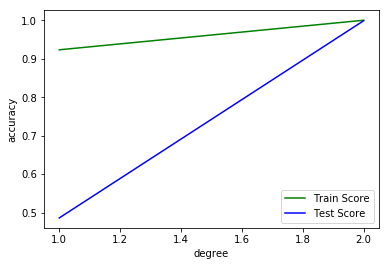

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

From the accuracy plot we can also see that the performance of ploynomial regression is really good. The test score is almost reach to 100% as the train score is also very high.

In [52]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
best_score = 0

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
    score = ridge.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': alpha}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.48
Best parameters: {'alpha': 0.01}


In [53]:
print(train_score_list)
print(test_score_list)

[0.9230776726887089, 0.9182122486549937, 0.8799194581091901, 0.8392554750416955, 0.8144312949623679]
[0.4820345023137453, 0.45960598453759605, 0.4256635055274275, 0.40619101992527495, 0.3793668895309923]


<IPython.core.display.Javascript object>


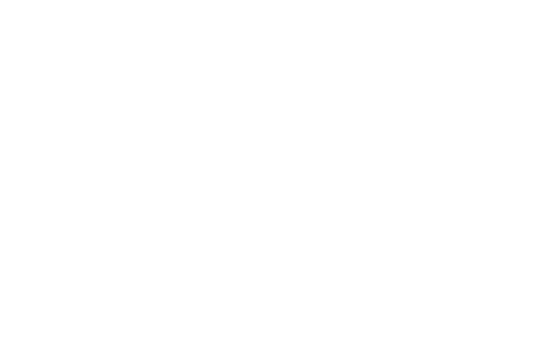

Text(0.5, 0, '$\\alpha$')

<IPython.core.display.Javascript object>


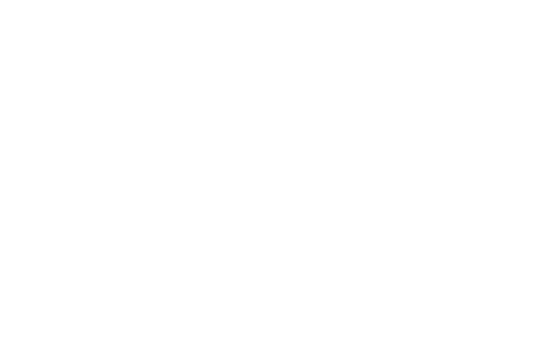

In [54]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

From the plot we can get that the ridge regression doesn't perform well for this dataset. The test score is still very low even we choose the different the regularization terms. From the above good model we think the reason ridge regression doesn't perform well is unappropriate features selection.

In [55]:
ridge = Ridge(0.01)
scores = cross_val_score(ridge, X, y)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.66109115 0.22662305 0.04689411]
Average cross-validation score: 0.31


C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


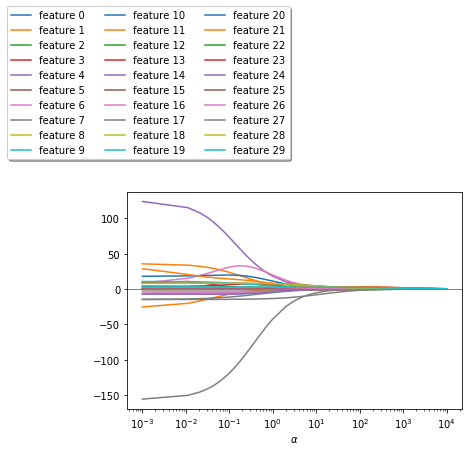

In [56]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,30):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='right', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

This plot shows the values of the coefficients according to the different regularization terms.

In [57]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
best_score = 0

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    score = lasso.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': alpha}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.44
Best parameters: {'alpha': 0.01}


C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5, 0, '$\\alpha$')

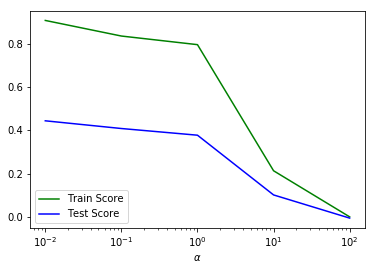

In [58]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

From the plot above, we can say the lasso regression is not good for this dataset. Since the test score is really low at the different regularize levels.

In [59]:
lasso = Lasso(0.01)
scores = cross_val_score(lasso, X, y)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.64526458  0.39897059 -1.33513106]
Average cross-validation score: -0.10


C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

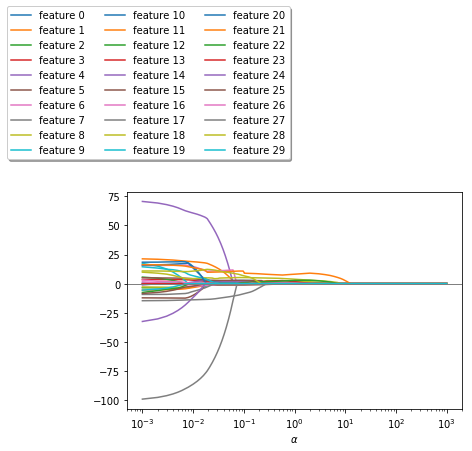

In [60]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,30):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='right', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

The above plot shows the details of the coeffient with the different regularization terms.

In [61]:
from sklearn.svm import SVR

print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVR
        clf = SVR(kernel='linear',gamma=gamma, C=C)
        clf.fit(X_train,y_train)
        # evaluate the SVR on the test set
        score = clf.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 581   size of test set: 194
Best score: 0.40
Best parameters: {'C': 100, 'gamma': 0.001}


In [62]:
#clf = SVR(kernel='linear',gamma=0.001, C=100)
#scores = cross_val_score(clf, X, y)
#print("Cross-validation scores: {}".format(scores))
#print("Average cross-validation score: {:.2f}".format(scores.mean()))
#Cross-validation scores: [0.39114832 0.62716808 0.59497685]
#Average cross-validation score: 0.54

We tried the linear SVM regression algorithm and got the results above. We used the Grid Search to find the best parameters under the best test score and find the cross-validation score of the model with the best parameter. 50% is not a very good test score, just not too bad.

In [63]:
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVR
        clf = SVR(kernel='poly',gamma=gamma, C=C)
        clf.fit(X_train,y_train)
        # evaluate the SVR on the test set
        score = clf.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 581   size of test set: 194
Best score: 0.90
Best parameters: {'C': 0.1, 'gamma': 0.01}


In [64]:
#clf = SVR(kernel='poly',gamma=0.1, C=10)
#scores = cross_val_score(clf, X, y)
#print("Cross-validation scores: {}".format(scores))
#print("Average cross-validation score: {:.2f}".format(scores.mean()))

We applied poly SVM regression to our dataset and found a better fit, which had a test score of 0.95 with C=10, gamma=0.1.

In [65]:
from sklearn.neighbors import KNeighborsRegressor
train_score_array = []
test_score_array = []
best_score = 0
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))
for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))
    score = knn_reg.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'k':k}
        
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Size of training set: 581   size of test set: 194
Best score: 0.19
Best parameters: {'k': 3}


In [66]:
knn_reg = KNeighborsRegressor(3)
scores = cross_val_score(knn_reg, X, y)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.07627621 0.55358047 0.3766667 ]
Average cross-validation score: 0.34


C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


At last we tried the KNN regression algorithm. The best score is only 0.19 when k=3, we can't choose this model.

In [67]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test_org)
lreg.fit(X_poly, y)
print(lreg.score(X_test_poly, y_test))

1.0


From the above models evaluations we can see the ploynomial model has the best performance for this dataset. We train all the dataset with ploynomial regression algorithm and get the test score of 1.

# Classification Task

In [68]:
X = data2.drop('Risk',axis = 1)
y = data2['Risk']

Then we comes to the classification part. We consider 'Risk' column as the target column, and the rest are features.

In [69]:
X.shape

(775, 30)

In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In this part we split the dataset into two parts: train and split and use MinMaxScaler to scale the data.

In [71]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

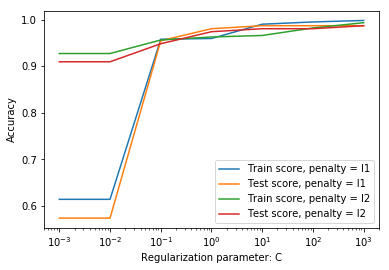

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

From the above accuracy plot we can get that when the regularization parameter is 1000, the logistic regression perform really well no matter the penalty is l1 or l2. The train score and test score are almost equal to 1. Logistic regression algorithm is a good fit for the classification of our dataset.

In [73]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

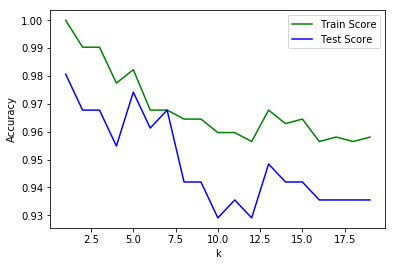

In [74]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

Then we tried the KNN classification, we can generate the conclusion from the plot that when k=1, the performance of KNN algorithm is best for our dataset, with the test score is more than 0.98, train score is 1.

In [75]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Train score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 1.0000
Train score: 0.9806


In [76]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.95752896 0.97297297 0.88326848]
Average cross-validation score: 0.94


C:\Users\shuti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


The average cross-validation score for KNN classification when k=1 is 0.94, which is a good score.

In [77]:
from sklearn.svm import SVC, LinearSVC

In [78]:
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        clf = SVC(kernel='linear',gamma=gamma, C=C)
        clf.fit(X_train,y_train)
        # evaluate the SVC on the test set
        score = clf.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 620   size of test set: 155
Best score: 0.99
Best parameters: {'C': 10, 'gamma': 0.001}


The best linear SVC model for this dataset has 0.99 test score with C=10, gamma=0.001.

In [79]:
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        clf = SVC(kernel='rbf',gamma=gamma, C=C)
        clf.fit(X_train,y_train)
        # evaluate the SVC on the test set
        score = clf.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 620   size of test set: 155
Best score: 0.99
Best parameters: {'C': 10, 'gamma': 10}


The best kernel=rbf SVC classification for this dataset has the best score of 0.99 with c=10 and gamma=10.

In [80]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.987


When we use the decision tree classifier for this dataset, setting the max_depth=4, we can get 100% accuracy of both training set and test set.

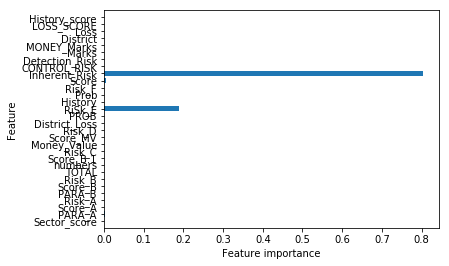

In [81]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def plot_feature_importances_risk(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_risk(dtree)

In [82]:
from sklearn.metrics import confusion_matrix
pred_dtree = dtree.predict(X_test)
confusion = confusion_matrix(y_test, pred_dtree)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[89  0]
 [ 2 64]]


In [83]:
dtree.decision_path(X, check_input=True)

<775x11 sparse matrix of type '<class 'numpy.int64'>'
	with 1550 stored elements in Compressed Sparse Row format>

In [84]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [59]:
X.columns[24]

'Audit_Risk'

From the features importances plot and decision tree graph we can conclude that the Audit_Risk feature is essential to classify the data. If the Audit_Risk score is higher than 0.004, we can predict the Risk column is 1, or the Risk is 0. The test set has 100% accuracy with decision tree classification so we consider this model is best for the risk classification of our dataset.

In [74]:
! pip install pyramid.arima

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [76]:
! python -m pip install --upgrade pip mgpack

  Using cached https://files.pythonhosted.org/packages/d8/f3/413bab4ff08e1fc4828dfc59996d721917df8e8583ea85385d51125dceff/pip-19.0.3-py2.py3-none-any.whl


  Could not find a version that satisfies the requirement mgpack (from versions: )
No matching distribution found for mgpack
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [80]:
from pyramid.arima import auto_arima